In [1]:
# Import modules
import numpy as np
import tensorflow as tf
import sys
import os.path
from time import time
from time import gmtime, strftime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Path and directory information
home_dir = os.path.expanduser("~") + '/'
cwd = os.getcwd()

runName = strftime("%m%d%Yrun", gmtime())
plot = 0
saveplot = 0

# path information

# check if folder exists and put files inside there
saveDir = homeDir + 'phd-project/'  + runName + '/'
if not os.path.exists(saveDir):
    os.makedirs(saveDir)

dataDir = '/users/jk/13/dbj/NN_CO/run.v8-02-01.G5_tagco_new_3Dchem/timeseries2/'
emDir = '/users/jk/13/dbj/NN_CO/'
#yrs = ['2007', '2008']
yrs = ['2006', '2007', '2008', '2009', '2010', '2011']
testingYear = 2007
mnths = ['0' + str(i) for i in range(1, 10)] + [str(i) for i in range(10, 13)]
days = ['0' + str(i) for i in range(1, 10)] + [str(i) for i in range(10, 32)]
emNames = []
fnames = []
tmp = []
prefix = 'v8.G5_4x5_tagCO_ts.'
suffix = '_new.nc'

for y in yrs:

    emNames.append(emDir + 'GEOS-Chem_CO_emiss_mass_NN_' + y + '.nc')

    for m in mnths:
        for d in days:
            fnames.append(dataDir + prefix + '{0}{1}{2}'.format(y, m, d) + suffix)
    
    for d in range(29, 32):
        if y != '2008':
            tmp.append(dataDir + prefix + '{0}02{1}'.format(y, d) + suffix)

    for d in range(30, 32):
        if y == '2008':
            tmp.append(dataDir + prefix + '200802{0}'.format(d) + suffix)

    for m in ['04', '06', '09', '11']:
        tmp.append(dataDir + prefix + '{0}{1}{2}'.format(y, m, '31') + suffix)

for t in tmp:
    fnames.remove(t)

# control what data is let into the network
field = 1
pressure = 1
winds = 1
temp = 1
humidity = 1
pbl = 1

uwind_metadata = ['DAO_3D_S__UWND', 'Uwind', 'm/s']
vwind_metadata = ['DAO_3D_S__VWND', 'Vwind', 'm/s']
pressure_metadata = ['PEDGE_S__PEDGE', 'Pressure', 'hPa']
temp_metadata = ['DAO_3D_S__TMPU', 'Temperature', 'K']
humidity_metadata = ['TIME_SER__RH', 'Humidity', '%']
pbl_metadata = ['PBLDEPTH__PBL_M', 'PBL', 'm']
source_metadata = ['CO__SRCE__COanth', 'COSource', 'kg']
field_metadata = ['IJ_AVG_S__CO', 'COField', 'ppbv']

metadatum = []

if winds:
    metadatum.append(uwind_metadata)
    metadatum.append(vwind_metadata)

if pressure:
    metadatum.append(pressure_metadata)

if temp:
    metadatum.append(temp_metadata)
    
if humidity:
    metadatum.append(humidity_metadata)
    
if pbl:
    metadatum.append(pbl_metadata)

if field:
    metadatum.append(field_metadata)

# describe the geometry of the area to analyze
lon_i = 20
lon_f = 21
lat_i = 32
lat_f = 33

# total days, training days, and testing days
numYears = len(yrs)
d = 0
n = 0
for yr in yrs:
    y = int(float(yr))
    if y % 4 != 0:
        n += 365 * 24
        d += 365
    else:
        n += 366 * 24
        d += 366

rawData = np.zeros((n, 1))

# network parameters
reg = 0
hiddenNeurons = 5


# Start an interactive session
sess = tf.InteractiveSession()

Preparing Network Structure..


IOError: [Errno 2] No such file or directory: '/Users/tharshisri/-f/Uwind.npy'

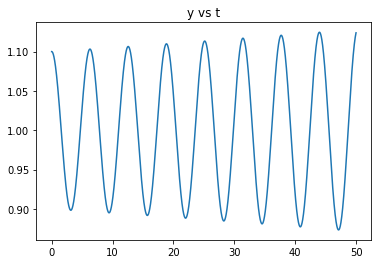

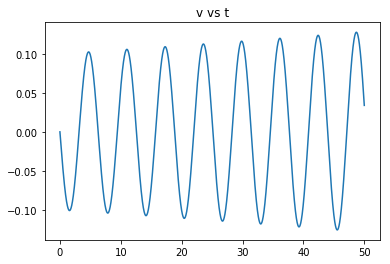

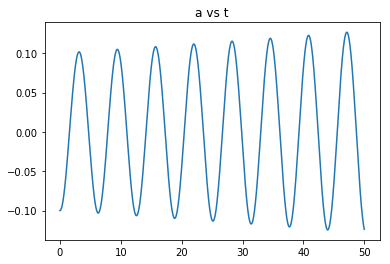

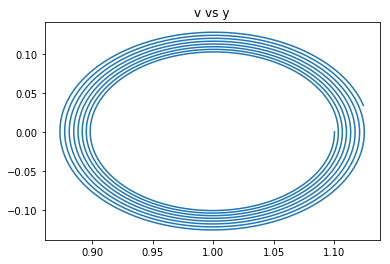

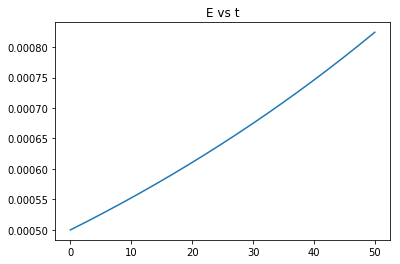

In [2]:
# Build a deep FFNN for CO prediction

# Create placeholders for the 
# input and the target
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [3]:
# If I give you the position and velocity,
# can a machine tell me the next point
# in phase space?